# Imports

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definition du chemin des datas

In [2]:
path_data = '.'

In [3]:
filename_lignes = 'Ligne.csv'
path_data_lignes = os.path.join(path_data, filename_lignes)
path_data_lignes

'./Ligne.csv'

# variable

In [4]:
indice = 0.2

# Creation du dataframe panda

In [5]:
df_lignes = pd.read_csv(path_data_lignes, sep=";", encoding= 'unicode_escape')

<ipython-input-5-345dcfc8ddc5>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lignes = pd.read_csv(path_data_lignes, sep=";", encoding= 'unicode_escape')


In [6]:
df_lignes

,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12
0,140500651,1.0,1.0,C,2625.0,10/04/2018,ALU,HO,OF,1,"1032,9",140500651-02,NaN
1,140500651,2.0,1.0,C,2625.0,10/04/2018,ALU,HO,OF,1,"1032,9",140500651-02,NaN
2,140600145,1.0,8.0,C,5505.0,18/04/2018,ALU,FE,OF,1,"13566,08",140600145-03,NaN
3,140600145,2.0,1.0,C,5505.0,18/04/2018,ALU,PF,OF,1,"2126,06",140600145-03,NaN
4,140600145,3.0,1.0,C,5505.0,18/04/2018,ALU,FE,OF,1,"1268,37",140600145-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133753,220400553-00,1.0,1.0,D,7702.0,13/04/2022,BOIS,ODB,BAS,1,608,NaN,NaN
133754,220400560-00,1.0,1.0,D,5959.0,13/04/2022,ALU,ODB,FX,1,"1138,45",NaN,NaN
133755,220400560-00,2.0,0.0,D,5959.0,13/04/2022,ALU,ODB,FX,2,0,NaN,NaN
133756,220400561-00,1.0,1.0,D,12560.0,13/04/2022,ALU,FE,OF,1,"1374,98",NaN,NaN


In [7]:
df_lignes.dtypes

N¡ CDE              object
L                  float64
Qte                float64
Type                object
CodeClient         float64
DateCreation        object
Gestionnaire        object
Type Menuiserie     object
Ouverture           object
Nb Zone             object
CA HT               object
Transformation      object
Unnamed: 12         object
dtype: object

# Formattage des donnees

## Fichier Ligne

### Suppression des lignes sans N° Client

In [8]:
NbLigneAvant = df_lignes.shape[0]
df_lignes = df_lignes.drop(df_lignes[df_lignes.CodeClient.isnull()].index) 
NbLigneApres = df_lignes.shape[0]
print(str(NbLigneAvant - NbLigneApres) + ' lignes supprimée(s)')

100 lignes supprimée(s)


# range les donnéés

In [9]:
df_lignes["Date_Creation"] = df_lignes.DateCreation.astype("datetime64[ns]")
df_lignes["CodeClient"] = df_lignes.CodeClient.astype("int")
df_lignes["CA HT"] = df_lignes["CA HT"].astype("str").str.replace(",",".").astype("float")

df_lignes

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '18/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '17/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '30/07/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12,Date_Creation
0,140500651,1.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04
1,140500651,2.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04
2,140600145,1.0,8.0,C,5505,18/04/2018,ALU,FE,OF,1,13566.08,140600145-03,NaN,2018-04-18
3,140600145,2.0,1.0,C,5505,18/04/2018,ALU,PF,OF,1,2126.06,140600145-03,NaN,2018-04-18
4,140600145,3.0,1.0,C,5505,18/04/2018,ALU,FE,OF,1,1268.37,140600145-03,NaN,2018-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133753,220400553-00,1.0,1.0,D,7702,13/04/2022,BOIS,ODB,BAS,1,608.00,NaN,NaN,2022-04-13
133754,220400560-00,1.0,1.0,D,5959,13/04/2022,ALU,ODB,FX,1,1138.45,NaN,NaN,2022-04-13
133755,220400560-00,2.0,0.0,D,5959,13/04/2022,ALU,ODB,FX,2,0.00,NaN,NaN,2022-04-13
133756,220400561-00,1.0,1.0,D,12560,13/04/2022,ALU,FE,OF,1,1374.98,NaN,NaN,2022-04-13


# range data add champ nego and year

In [10]:
df_lignes['NCDE'] = df_lignes['N¡ CDE'].str.split('-', expand= True)[0]
df_lignes['year'] = df_lignes['DateCreation'].str.split('/', expand= True)[2]
df_lignes['month']= df_lignes['DateCreation'].str.split('/', expand= True)[1]

#  add champ is_devis and is_commande

In [11]:
df_lignes["is_devis"] = df_lignes["Type"] == "D"
df_lignes["is_commande"] = df_lignes["Type"] == "C"

# remove CA == 0

In [12]:
NbLigneAvant = df_lignes.shape[0]
df_lignes = df_lignes.loc[df_lignes["CA HT"] != 0]
NbLigneApres = df_lignes.shape[0]
print(str(NbLigneAvant - NbLigneApres) + ' lignes supprimée(s)')
df_lignes

17501 lignes supprimée(s)


,N¡ CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12,Date_Creation,NCDE,year,month,is_devis,is_commande
0,140500651,1.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04,140500651,2018,04,False,True
1,140500651,2.0,1.0,C,2625,10/04/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN,2018-10-04,140500651,2018,04,False,True
2,140600145,1.0,8.0,C,5505,18/04/2018,ALU,FE,OF,1,13566.08,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
3,140600145,2.0,1.0,C,5505,18/04/2018,ALU,PF,OF,1,2126.06,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
4,140600145,3.0,1.0,C,5505,18/04/2018,ALU,FE,OF,1,1268.37,140600145-03,NaN,2018-04-18,140600145,2018,04,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133752,220400549-00,1.0,1.0,D,11925,13/04/2022,PVC,ODB,OF,1,993.01,NaN,NaN,2022-04-13,220400549,2022,04,True,False
133753,220400553-00,1.0,1.0,D,7702,13/04/2022,BOIS,ODB,BAS,1,608.00,NaN,NaN,2022-04-13,220400553,2022,04,True,False
133754,220400560-00,1.0,1.0,D,5959,13/04/2022,ALU,ODB,FX,1,1138.45,NaN,NaN,2022-04-13,220400560,2022,04,True,False
133756,220400561-00,1.0,1.0,D,12560,13/04/2022,ALU,FE,OF,1,1374.98,NaN,NaN,2022-04-13,220400561,2022,04,True,False


# groupby nego and CodeClient

In [13]:
grouped = df_lignes.groupby(['CodeClient','NCDE'])

results = grouped["is_devis", "is_commande"].sum()
results['commande'] = 0
results.loc[results['is_commande'] >0 , 'commande' ] = 1

results['nego'] = 0
results.loc[(results['commande']== 1) | (results['is_devis'] >0 ), 'nego' ] = 1

results

<ipython-input-13-28f18085286e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = grouped["is_devis", "is_commande"].sum()


is_devis  is_commande  commande  nego
CodeClient NCDE                                            
1          181000520         1            0         0     1
           181001868         1            1         1     1
           181200428         1            0         0     1
           190200407         1            0         0     1
           190301284         6            0         0     1
...                        ...          ...       ...   ...
14747      220400305         1            0         0     1
14751      220400302         1            0         0     1
           220400303         1            0         0     1
14752      220400438         1            0         0     1
14754      220400416         2            0         0     1

[52164 rows x 4 columns]

In [14]:
result = results.groupby(['CodeClient']).sum()

result

,is_devis,is_commande,commande,nego
CodeClient,,,,
1,67,11,9,21
3,91,25,15,25
5,3,0,0,1
12,2,1,1,2
13,1,1,1,1
...,...,...,...,...
14743,1,0,0,1
14747,2,0,0,2
14751,2,0,0,2


# calcul transformation

In [15]:
result['transform'] = result['commande'] / result['nego']

result

,is_devis,is_commande,commande,nego,transform
CodeClient,,,,,
1,67,11,9,21,0.428571
3,91,25,15,25,0.600000
5,3,0,0,1,0.000000
12,2,1,1,2,0.500000
13,1,1,1,1,1.000000
...,...,...,...,...,...
14743,1,0,0,1,0.000000
14747,2,0,0,2,0.000000
14751,2,0,0,2,0.000000


In [16]:
print(f'transform <= {indice}')

result.loc[ result['transform'] <= indice]

transform <= 0.2


,is_devis,is_commande,commande,nego,transform
CodeClient,,,,,
5,3,0,0,1,0.000000
16,5,0,0,3,0.000000
22,9,1,1,7,0.142857
37,1,0,0,1,0.000000
51,5,0,0,4,0.000000
...,...,...,...,...,...
14743,1,0,0,1,0.000000
14747,2,0,0,2,0.000000
14751,2,0,0,2,0.000000


# Function montre_transform

In [17]:
def montre_transform(result, indice):
    print(f'transform == {indice}')

    print(result.loc[ result['transform'] == indice].to_string())

In [18]:
trans = [i/10.0 for i in range(10)]

for i in trans:
    montre_transform(result, i)

transform == 0.0
            is_devis  is_commande  commande  nego  transform
CodeClient                                                  
5                  3            0         0     1        0.0
16                 5            0         0     3        0.0
37                 1            0         0     1        0.0
51                 5            0         0     4        0.0
96                 1            0         0     1        0.0
100                2            0         0     2        0.0
131               11            0         0     1        0.0
136                7            0         0     3        0.0
146                2            0         0     2        0.0
150               10            0         0     9        0.0
151                6            0         0     6        0.0
152                1            0         0     1        0.0
171                1            0         0     1        0.0
201                1            0         0     1        0.0
207    

<AxesSubplot:ylabel='Frequency'>

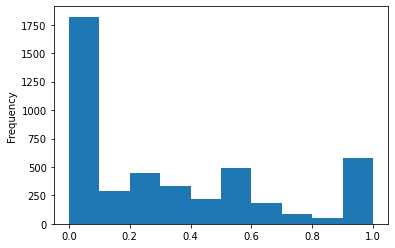

In [19]:
result['transform'].plot(kind="hist")

# groupby nego and Gestionnaire

In [20]:
grouped = df_lignes.groupby(['Gestionnaire', 'NCDE'])

results = grouped["is_devis", "is_commande"].sum()
results['commande'] = 0
results.loc[results['is_commande'] > 0, 'commande'] = 1

results['nego'] = 0
results.loc[(results['commande'] == 1) | (results['is_devis'] > 0), 'nego'] = 1

results

<ipython-input-20-b22fdd9ce8a2>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = grouped["is_devis", "is_commande"].sum()


is_devis  is_commande  commande  nego
Gestionnaire NCDE                                            
ALU          140500651         0            2         1     1
             140600145         3            3         1     1
             150201297         2            0         0     1
             150300298         4            0         0     1
             150700563         9           14         1     1
...                          ...          ...       ...   ...
PVC          220400538         1            0         0     1
             220400540         0            1         1     1
             220400542         1            0         0     1
             220400547         1            0         0     1
             220400549         1            0         0     1

[51813 rows x 4 columns]

In [21]:
result = results.groupby(['Gestionnaire']).sum()

result

,is_devis,is_commande,commande,nego
Gestionnaire,,,,
ALU,60445,9445,6201,26933
BOIS,13681,4253,3562,10627
PVC,21265,7068,5669,14253


# calcul transformation

In [22]:
result['transform'] = result['commande'] / result['nego']

result

,is_devis,is_commande,commande,nego,transform
Gestionnaire,,,,,
ALU,60445,9445,6201,26933,0.230238
BOIS,13681,4253,3562,10627,0.335184
PVC,21265,7068,5669,14253,0.397741


<AxesSubplot:xlabel='Gestionnaire'>

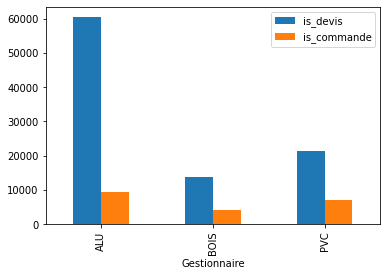

In [23]:
result.loc[ :, ['is_devis','is_commande']].plot(kind="bar")

<AxesSubplot:xlabel='Gestionnaire'>

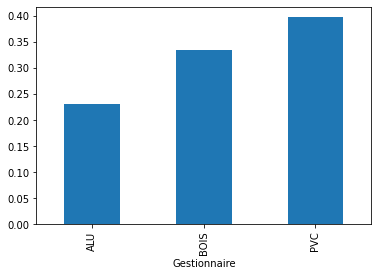

In [24]:
result['transform'].plot(kind="bar")

# groupby nego and CodeClient avec repliable

In [25]:
grouped = df_lignes.loc[df_lignes['Type Menuiserie'] == 'MENREPLI'].groupby(['CodeClient','NCDE'])

results = grouped["is_devis", "is_commande"].sum()
results['commande'] = 0
results.loc[results['is_commande'] >0 , 'commande' ] = 1

results['nego'] = 0
results.loc[(results['commande']== 1) | (results['is_devis'] >0 ), 'nego' ] = 1

results

<ipython-input-25-158074fe1052>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = grouped["is_devis", "is_commande"].sum()


is_devis  is_commande  commande  nego
CodeClient NCDE                                            
33         201000377         1            0         0     1
           201000978         1            0         0     1
           201001417         1            0         0     1
           201100645         2            2         1     1
           210300104         1            0         0     1
...                        ...          ...       ...   ...
14603      211200238         1            0         0     1
14641      220100097         1            0         0     1
14649      220100562         1            0         0     1
14663      220400287         1            0         0     1
14691      220200883         2            1         1     1

[1025 rows x 4 columns]

In [26]:
result = results.groupby(['CodeClient']).sum()

result

,is_devis,is_commande,commande,nego
CodeClient,,,,
33,8,2,1,7
43,3,0,0,2
45,2,0,0,1
63,2,0,0,2
113,1,0,0,1
...,...,...,...,...
14603,3,0,0,2
14641,1,0,0,1
14649,1,0,0,1


# calcul transformation

In [27]:
result['transform'] = result['commande'] / result['nego']

result

,is_devis,is_commande,commande,nego,transform
CodeClient,,,,,
33,8,2,1,7,0.142857
43,3,0,0,2,0.000000
45,2,0,0,1,0.000000
63,2,0,0,2,0.000000
113,1,0,0,1,0.000000
...,...,...,...,...,...
14603,3,0,0,2,0.000000
14641,1,0,0,1,0.000000
14649,1,0,0,1,0.000000


In [28]:
print(f'transform <= {indice}')

result.loc[ result['transform'] <= indice]

transform <= 0.2


,is_devis,is_commande,commande,nego,transform
CodeClient,,,,,
33,8,2,1,7,0.142857
43,3,0,0,2,0.000000
45,2,0,0,1,0.000000
63,2,0,0,2,0.000000
113,1,0,0,1,0.000000
...,...,...,...,...,...
14581,2,0,0,1,0.000000
14603,3,0,0,2,0.000000
14641,1,0,0,1,0.000000


<AxesSubplot:ylabel='Frequency'>

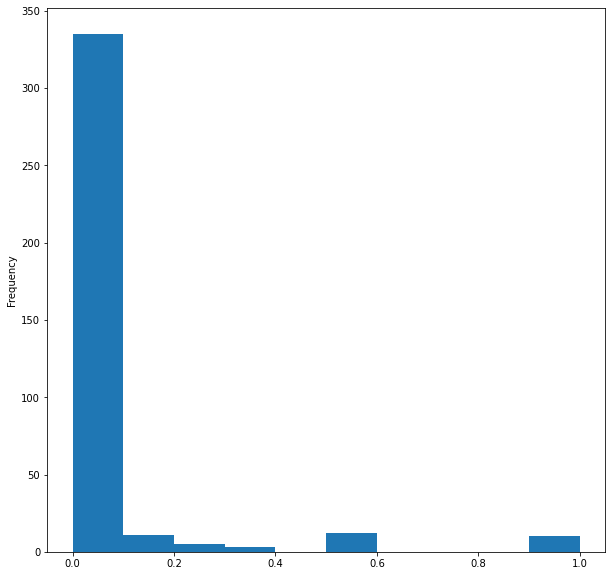

In [29]:
result['transform'].plot(kind="hist", figsize=(10,10))

In [30]:
result['transform'].shape[0]

376

In [31]:
result.loc[(result['is_commande'] == 0)&(result["nego"] == 1), "transform"].shape[0]

222

# groupby clientCode avec PVC

In [32]:
df_pvc = df_lignes.loc[df_lignes['Gestionnaire'] == 'PVC']
grouped = df_pvc.groupby(['CodeClient','NCDE', 'year'])

results = grouped["is_commande"].sum()

results

CodeClient  NCDE       year
1           181000520  2018    0
            200601158  2020    1
            201100097  2020    0
            210600527  2021    1
            220200978  2022    3
                              ..
14737       220301561  2022    0
14738       220301398  2022    1
14739       220400058  2022    0
14743       220400381  2022    0
14751       220400302  2022    0
Name: is_commande, Length: 14753, dtype: int64

In [33]:
result = results.groupby(['CodeClient','year']).sum()

result

CodeClient  year
1           2018    0
            2020    1
            2021    1
            2022    3
3           2019    0
                   ..
14737       2022    0
14738       2022    1
14739       2022    0
14743       2022    0
14751       2022    0
Name: is_commande, Length: 5468, dtype: int64

In [34]:
result = result.reset_index()
result

,CodeClient,year,is_commande
0,1,2018,0
1,1,2020,1
2,1,2021,1
3,1,2022,3
4,3,2019,0
...,...,...,...
5463,14737,2022,0
5464,14738,2022,1
5465,14739,2022,0
5466,14743,2022,0


In [35]:
pivot_result = pd.pivot_table(result, values='is_commande', index=['CodeClient'], columns=['year'])

pivot_result = pivot_result.fillna(0)

pivot_result

year,2018,2019,2020,2021,2022
CodeClient,,,,,
1,0.0,0.0,1.0,1.0,3.0
3,0.0,0.0,0.0,4.0,0.0
16,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...
14737,0.0,0.0,0.0,0.0,0.0
14738,0.0,0.0,0.0,0.0,1.0
14739,0.0,0.0,0.0,0.0,0.0


In [36]:
pivot_result['18-19'] = pivot_result['2019'] - pivot_result['2018']
pivot_result['19-20'] = pivot_result['2020'] - pivot_result['2019']
pivot_result['20-21'] = pivot_result['2021'] - pivot_result['2020']
pivot_result['21-22'] = pivot_result['2022'] - pivot_result['2021']

# le meilleure client

In [37]:
pivot_result.sort_values(by=['20-21'], ascending=False)

year,2018,2019,2020,2021,2022,18-19,19-20,20-21,21-22
CodeClient,,,,,,,,,
239,2.0,1.0,2.0,27.0,2.0,-1.0,1.0,25.0,-25.0
10040,0.0,0.0,0.0,21.0,0.0,0.0,0.0,21.0,-21.0
5181,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,-14.0
915,9.0,10.0,6.0,19.0,10.0,1.0,-4.0,13.0,-9.0
12281,0.0,0.0,7.0,20.0,0.0,0.0,7.0,13.0,-20.0
...,...,...,...,...,...,...,...,...,...
3431,14.0,7.0,20.0,10.0,2.0,-7.0,13.0,-10.0,-8.0
953,0.0,5.0,12.0,2.0,3.0,5.0,7.0,-10.0,1.0
1618,1.0,4.0,16.0,3.0,0.0,3.0,12.0,-13.0,-3.0


# le pire client

In [38]:
pivot_result.sort_values(by=['20-21'], ascending=True)

year,2018,2019,2020,2021,2022,18-19,19-20,20-21,21-22
CodeClient,,,,,,,,,
3820,3.0,14.0,18.0,1.0,0.0,11.0,4.0,-17.0,-1.0
1618,1.0,4.0,16.0,3.0,0.0,3.0,12.0,-13.0,-3.0
9900,1.0,1.0,20.0,7.0,0.0,0.0,19.0,-13.0,-7.0
953,0.0,5.0,12.0,2.0,3.0,5.0,7.0,-10.0,1.0
3431,14.0,7.0,20.0,10.0,2.0,-7.0,13.0,-10.0,-8.0
...,...,...,...,...,...,...,...,...,...
14166,0.0,0.0,0.0,13.0,2.0,0.0,0.0,13.0,-11.0
915,9.0,10.0,6.0,19.0,10.0,1.0,-4.0,13.0,-9.0
5181,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,-14.0


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

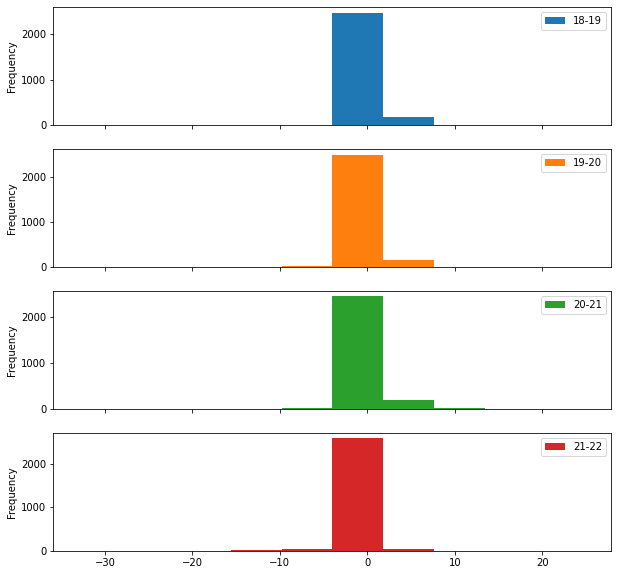

In [39]:
pivot_result.loc[:, ['18-19','19-20','20-21','21-22']].plot(kind="hist", figsize=(10,10), subplots=True)

In [40]:
top = pivot_result.sort_values(by=['20-21'], ascending=False).head(5)
top

year,2018,2019,2020,2021,2022,18-19,19-20,20-21,21-22
CodeClient,,,,,,,,,
239,2.0,1.0,2.0,27.0,2.0,-1.0,1.0,25.0,-25.0
10040,0.0,0.0,0.0,21.0,0.0,0.0,0.0,21.0,-21.0
5181,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,-14.0
915,9.0,10.0,6.0,19.0,10.0,1.0,-4.0,13.0,-9.0
12281,0.0,0.0,7.0,20.0,0.0,0.0,7.0,13.0,-20.0


In [41]:
bottom = pivot_result.sort_values(by=['20-21'], ascending=True).head(5)
bottom

year,2018,2019,2020,2021,2022,18-19,19-20,20-21,21-22
CodeClient,,,,,,,,,
3820,3.0,14.0,18.0,1.0,0.0,11.0,4.0,-17.0,-1.0
1618,1.0,4.0,16.0,3.0,0.0,3.0,12.0,-13.0,-3.0
9900,1.0,1.0,20.0,7.0,0.0,0.0,19.0,-13.0,-7.0
953,0.0,5.0,12.0,2.0,3.0,5.0,7.0,-10.0,1.0
3431,14.0,7.0,20.0,10.0,2.0,-7.0,13.0,-10.0,-8.0


In [42]:
df_result =pd.DataFrame(data=[pivot_result.loc[pivot_result["20-21"]>0].shape[0],
                   pivot_result.loc[pivot_result["20-21"]<0].shape[0],
                   pivot_result.loc[pivot_result["20-21"]==0].shape[0]],index=["<", ">","="], columns=["number"])
df_result

,number
<,500
>,452
=,1734


In [43]:
df_dict = pivot_result.loc[pivot_result["20-21"]<0, "20-21"].value_counts()
df_dict.sort_index(ascending=False)

-1.0     276
-2.0      94
-3.0      35
-4.0      17
-5.0      15
-6.0       4
-7.0       2
-8.0       2
-9.0       1
-10.0      3
-13.0      2
-17.0      1
Name: 20-21, dtype: int64

<AxesSubplot:ylabel='Frequency'>

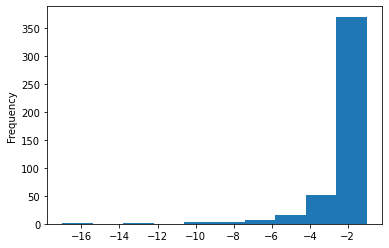

In [44]:
pivot_result.loc[pivot_result["20-21"]<0, "20-21"].plot(kind="hist")

# un % de commandes PVC très inférieur à leur % de commandes total

In [45]:
df_lignes["is_pvc"] = (df_lignes["Gestionnaire"] == "PVC") & (df_lignes["is_commande"])
grouped = df_lignes.groupby(['CodeClient','NCDE'])
results = grouped["is_pvc", "is_commande"].sum()

results

<ipython-input-45-a6340cd44f6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lignes["is_pvc"] = (df_lignes["Gestionnaire"] == "PVC") & (df_lignes["is_commande"])
<ipython-input-45-a6340cd44f6e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = grouped["is_pvc", "is_commande"].sum()


is_pvc  is_commande
CodeClient NCDE                          
1          181000520       0            0
           181001868       0            1
           181200428       0            0
           190200407       0            0
           190301284       0            0
...                      ...          ...
14747      220400305       0            0
14751      220400302       0            0
           220400303       0            0
14752      220400438       0            0
14754      220400416       0            0

[52164 rows x 2 columns]

In [46]:
result = results.groupby("CodeClient").sum()
result["%"] = 0

result.loc[ result['is_commande'] >0 , '%'] = result["is_pvc"] / result["is_commande"]

result

,is_pvc,is_commande,%
CodeClient,,,
1,5,11,0.454545
3,4,25,0.160000
5,0,0,0.000000
12,0,1,0.000000
13,0,1,0.000000
...,...,...,...
14743,0,0,0.000000
14747,0,0,0.000000
14751,0,0,0.000000


<AxesSubplot:ylabel='Frequency'>

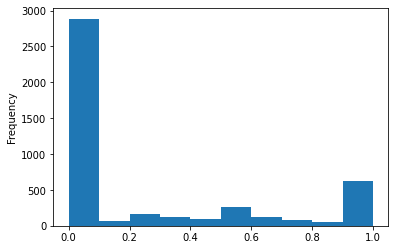

In [47]:
result['%'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

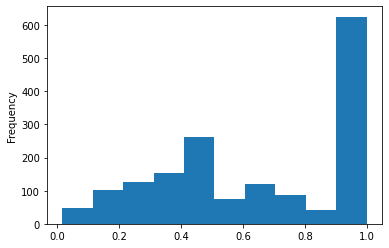

In [48]:
result.loc[result['%']>0, '%'].plot(kind="hist")

In [49]:
result.loc[result['%']>0.0, '%'].shape[0]

1637

# commandes en nb de zones par matériau

In [50]:
grouped = df_lignes.groupby(['Gestionnaire','Nb Zone', 'year'])
results = grouped["is_commande"].sum()
results

Gestionnaire  Nb Zone  year
ALU           1        2018     913
                       2019    1314
                       2020    1420
                       2021    1651
                       2022     708
                               ... 
PVC           ?        2018     161
                       2019     240
                       2020     225
                       2021     243
                       2022      73
Name: is_commande, Length: 94, dtype: int64

In [51]:
result = results.reset_index()

pivot_result = pd.pivot_table(result, values='is_commande', index=['Gestionnaire', 'Nb Zone'], columns=['year'])

pivot_result

year                    2018    2019    2020    2021   2022
Gestionnaire Nb Zone                                       
ALU          1         913.0  1314.0  1420.0  1651.0  708.0
             2          74.0   193.0   166.0   167.0   57.0
             3          48.0   103.0   144.0   179.0   70.0
             4          39.0    50.0    44.0    40.0   40.0
             5           4.0     1.0     5.0     2.0    0.0
             6           1.0     5.0     4.0     4.0    0.0
             ?         357.0   446.0   413.0   628.0  155.0
BOIS         1         757.0   984.0   848.0   992.0  285.0
             2           5.0     3.0    11.0     6.0    3.0
             3           4.0     1.0     0.0     3.0    0.0
             4           0.0     1.0     NaN     NaN    NaN
             5           0.0     NaN     0.0     NaN    NaN
             ?          79.0    85.0    63.0   100.0   23.0
PVC          1        1133.0  1336.0  1226.0  1417.0  435.0
             2          64.0    96.0    98.0    95.0   35.0
             3          29.0    40.0    25.0    41.0   17.0
             4           7.0     5.0    11.0     9.0    0.0
             5           2.0     1.0     0.0     0.0    1.0
             6           1.0     0.0     0.0     1.0    1.0
             ?         161.0   240.0   225.0   243.0   73.0

In [52]:
pivot_result['18-19'] = pivot_result['2019'] - pivot_result['2018']
pivot_result['19-20'] = pivot_result['2020'] - pivot_result['2019']
pivot_result['20-21'] = pivot_result['2021'] - pivot_result['2020']
pivot_result['21-22'] = pivot_result['2022'] - pivot_result['2021']

pivot_result

year                    2018    2019    2020    2021   2022  18-19  19-20  \
Gestionnaire Nb Zone                                                        
ALU          1         913.0  1314.0  1420.0  1651.0  708.0  401.0  106.0   
             2          74.0   193.0   166.0   167.0   57.0  119.0  -27.0   
             3          48.0   103.0   144.0   179.0   70.0   55.0   41.0   
             4          39.0    50.0    44.0    40.0   40.0   11.0   -6.0   
             5           4.0     1.0     5.0     2.0    0.0   -3.0    4.0   
             6           1.0     5.0     4.0     4.0    0.0    4.0   -1.0   
             ?         357.0   446.0   413.0   628.0  155.0   89.0  -33.0   
BOIS         1         757.0   984.0   848.0   992.0  285.0  227.0 -136.0   
             2           5.0     3.0    11.0     6.0    3.0   -2.0    8.0   
             3           4.0     1.0     0.0     3.0    0.0   -3.0   -1.0   
             4           0.0     1.0     NaN     NaN    NaN    1.0    NaN   
             5           0.0     NaN     0.0     NaN    NaN    NaN    NaN   
             ?          79.0    85.0    63.0   100.0   23.0    6.0  -22.0   
PVC          1        1133.0  1336.0  1226.0  1417.0  435.0  203.0 -110.0   
             2          64.0    96.0    98.0    95.0   35.0   32.0    2.0   
             3          29.0    40.0    25.0    41.0   17.0   11.0  -15.0   
             4           7.0     5.0    11.0     9.0    0.0   -2.0    6.0   
             5           2.0     1.0     0.0     0.0    1.0   -1.0   -1.0   
             6           1.0     0.0     0.0     1.0    1.0   -1.0    0.0   
             ?         161.0   240.0   225.0   243.0   73.0   79.0  -15.0   

year                  20-21  21-22  
Gestionnaire Nb Zone                
ALU          1        231.0 -943.0  
             2          1.0 -110.0  
             3         35.0 -109.0  
             4         -4.0    0.0  
             5         -3.0   -2.0  
             6          0.0   -4.0  
             ?        215.0 -473.0  
BOIS         1        144.0 -707.0  
             2         -5.0   -3.0  
             3          3.0   -3.0  
             4          NaN    NaN  
             5          NaN    NaN  
             ?         37.0  -77.0  
PVC          1        191.0 -982.0  
             2         -3.0  -60.0  
             3         16.0  -24.0  
             4         -2.0   -9.0  
             5          0.0    1.0  
             6          1.0    0.0  
             ?         18.0 -170.0

In [53]:
range_result = pivot_result.loc[:,['18-19','19-20','20-21','21-22']]
range_result

year                  18-19  19-20  20-21  21-22
Gestionnaire Nb Zone                            
ALU          1        401.0  106.0  231.0 -943.0
             2        119.0  -27.0    1.0 -110.0
             3         55.0   41.0   35.0 -109.0
             4         11.0   -6.0   -4.0    0.0
             5         -3.0    4.0   -3.0   -2.0
             6          4.0   -1.0    0.0   -4.0
             ?         89.0  -33.0  215.0 -473.0
BOIS         1        227.0 -136.0  144.0 -707.0
             2         -2.0    8.0   -5.0   -3.0
             3         -3.0   -1.0    3.0   -3.0
             4          1.0    NaN    NaN    NaN
             5          NaN    NaN    NaN    NaN
             ?          6.0  -22.0   37.0  -77.0
PVC          1        203.0 -110.0  191.0 -982.0
             2         32.0    2.0   -3.0  -60.0
             3         11.0  -15.0   16.0  -24.0
             4         -2.0    6.0   -2.0   -9.0
             5         -1.0   -1.0    0.0    1.0
             6         -1.0    0.0    1.0    0.0
             ?         79.0  -15.0   18.0 -170.0

In [54]:
range_result.groupby("Gestionnaire").sum()

year,18-19,19-20,20-21,21-22
Gestionnaire,,,,
ALU,676.0,84.0,475.0,-1641.0
BOIS,229.0,-151.0,179.0,-790.0
PVC,321.0,-133.0,221.0,-1244.0


<AxesSubplot:xlabel='Gestionnaire'>

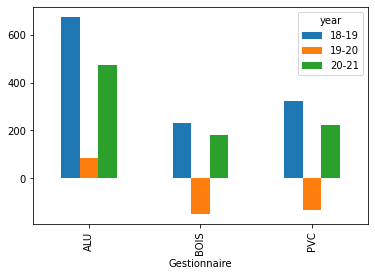

In [55]:
range_result.loc[:, ['18-19','19-20','20-21']].groupby("Gestionnaire").sum().plot(kind="bar")

In [56]:
range_result.groupby("Nb Zone").sum()

year,18-19,19-20,20-21,21-22
Nb Zone,,,,
1,831.0,-140.0,566.0,-2632.0
2,149.0,-17.0,-7.0,-173.0
3,63.0,25.0,54.0,-136.0
4,10.0,0.0,-6.0,-9.0
5,-4.0,3.0,-3.0,-1.0
6,3.0,-1.0,1.0,-4.0
?,174.0,-70.0,270.0,-720.0


<AxesSubplot:xlabel='Nb Zone'>

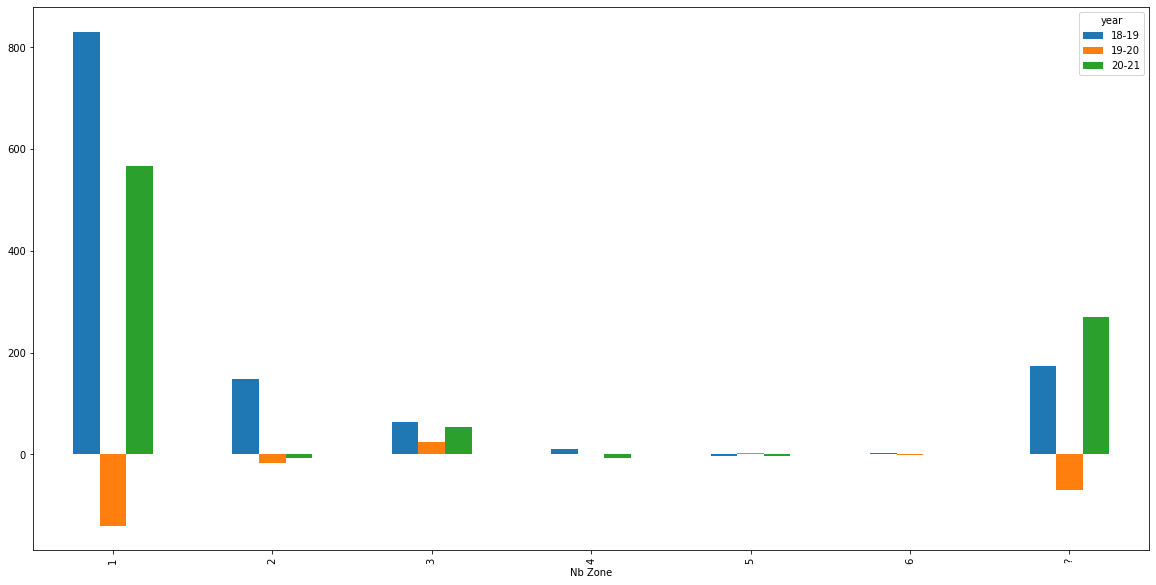

In [57]:
range_result.loc[:, ['18-19','19-20','20-21']].groupby("Nb Zone").sum().plot(kind="bar",figsize=(20,10))

# Fréquence de commande ? (Entre 3 et 5 clusters)

In [58]:
grouped = df_lignes.loc[df_lignes["is_commande"]].groupby(['CodeClient', 'Date_Creation'])

results = grouped["is_commande", "CA HT"].sum()

results

<ipython-input-58-be5bf51460a3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results = grouped["is_commande", "CA HT"].sum()


is_commande    CA HT
CodeClient Date_Creation                      
1          2018-12-11               1   126.00
           2020-07-30               1   599.00
           2020-10-09               1   385.82
           2021-03-05               1   124.00
           2021-06-21               1    26.00
...                               ...      ...
14691      2022-04-14               1  6371.35
14706      2022-03-21               2  1408.72
14709      2022-10-03               2  3829.41
14727      2022-06-04               1  1384.46
14738      2022-05-04               1   460.34

[14579 rows x 2 columns]

In [59]:
result = results.reset_index().sort_values(by=['CodeClient','Date_Creation'], ascending=True)

result["frequence"] = pd.Timedelta(seconds=0)

result.loc[result["CodeClient"].shift(-1) == result["CodeClient"], "frequence"] = (result["Date_Creation"].shift(-1) - result["Date_Creation"])

result["frequence"]= result["frequence"].shift(1)

result = result.fillna(pd.Timedelta(seconds=0))

result

,CodeClient,Date_Creation,is_commande,CA HT,frequence
0,1,2018-12-11,1,126.00,0 days
1,1,2020-07-30,1,599.00,597 days
2,1,2020-10-09,1,385.82,71 days
3,1,2021-03-05,1,124.00,147 days
4,1,2021-06-21,1,26.00,108 days
...,...,...,...,...,...
14574,14691,2022-04-14,1,6371.35,0 days
14575,14706,2022-03-21,2,1408.72,0 days
14576,14709,2022-10-03,2,3829.41,0 days
14577,14727,2022-06-04,1,1384.46,0 days


In [60]:
range_result = pd.concat([result.groupby("CodeClient")["frequence"].mean().dt.days, result.groupby("CodeClient")["CA HT"].mean()], axis=1)

range_result = range_result.reset_index()

range_result

,CodeClient,frequence,CA HT
0,1,129,556.491111
1,3,106,2454.157692
2,12,0,2889.900000
3,13,0,1135.780000
4,22,0,2253.280000
...,...,...,...
2765,14691,0,6371.350000
2766,14706,0,1408.720000
2767,14709,0,3829.410000
2768,14727,0,1384.460000


In [61]:
range_result.loc[range_result["CA HT"]>4000, "CA HT"] = 4000

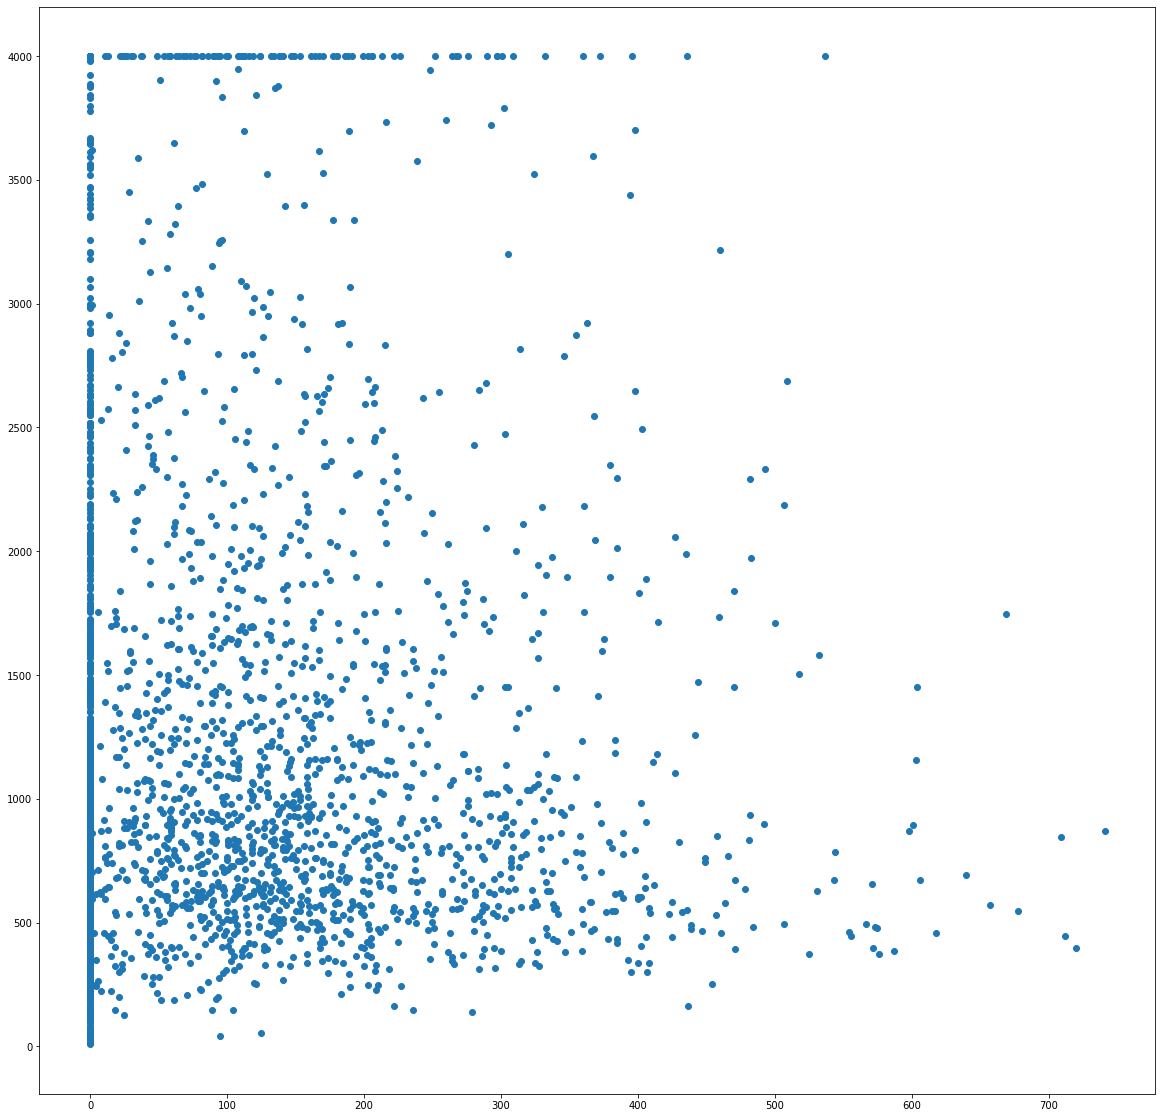

In [62]:
x = range_result["frequence"].tolist()
y = range_result["CA HT"].tolist()
plt.figure(figsize=(20,20))
plt.scatter(x, y)
plt.show()

In [63]:
filter_result = range_result.loc[range_result["frequence"] != 0]

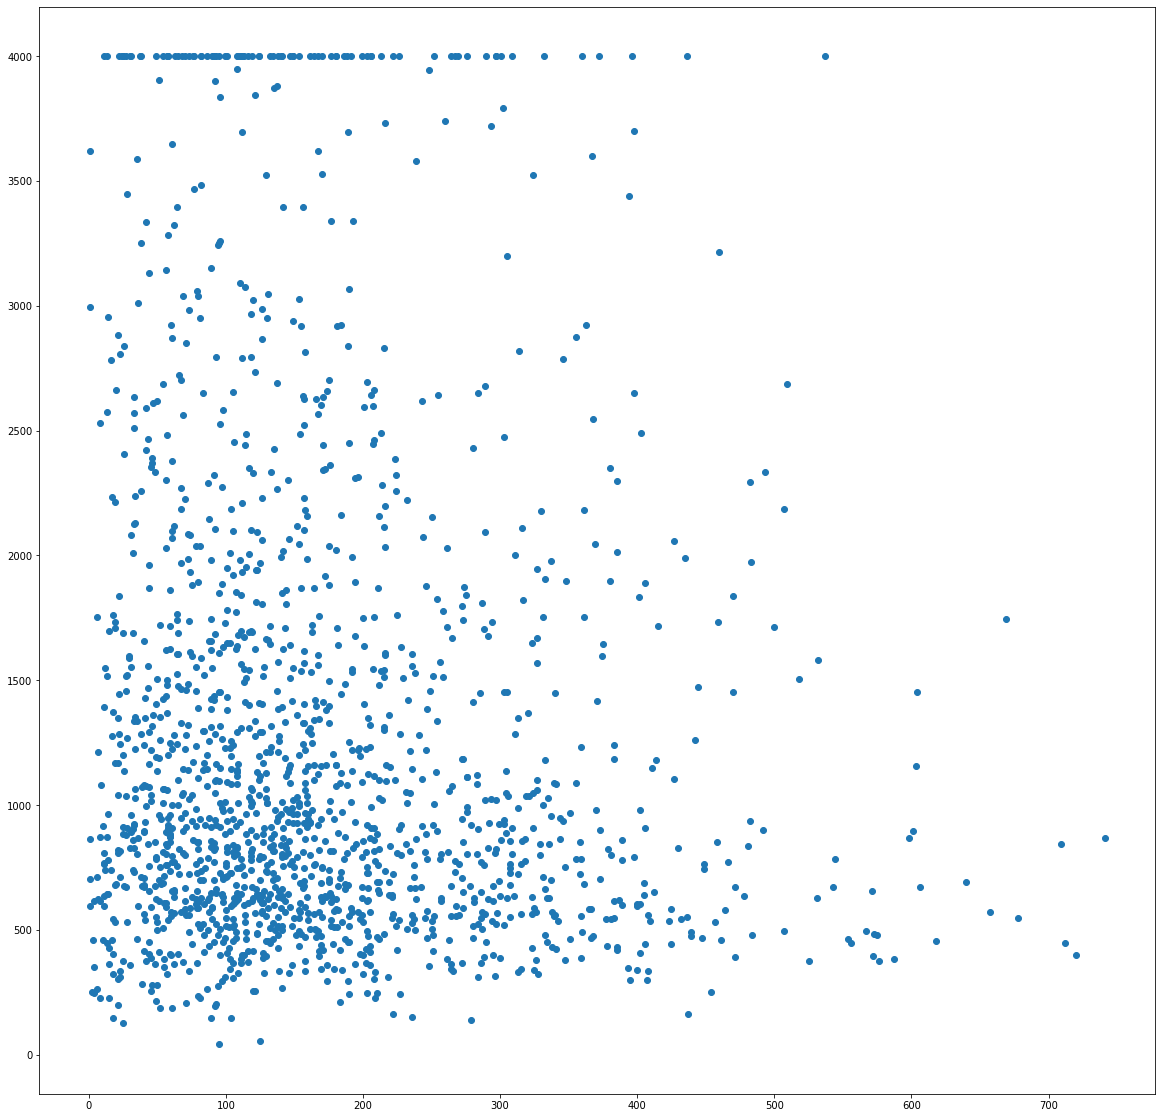

In [64]:
x = filter_result["frequence"].tolist()
y = filter_result["CA HT"].tolist()
plt.figure(figsize=(20,20))
plt.scatter(x, y)
plt.show()

<ipython-input-65-8e4908da4c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_result['cluster'] = kmeans.fit_predict(filter_result[['frequence', 'CA HT']])
<ipython-input-65-8e4908da4c33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_result['cen_x'] = filter_result.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
<ipython-input-65-8e4908da4c33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

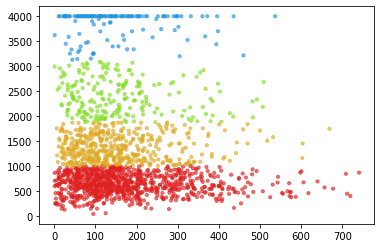

In [65]:
kmeans = KMeans(n_clusters=4, random_state=0)
filter_result['cluster'] = kmeans.fit_predict(filter_result[['frequence', 'CA HT']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
filter_result['cen_x'] = filter_result.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
filter_result['cen_y'] = filter_result.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', "#DFA920"]
filter_result['c'] = filter_result.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
plt.scatter(filter_result['frequence'], filter_result['CA HT'], c=filter_result.c, alpha = 0.6, s=10)